## 第五回課題

制御対象の伝達関数を
$$
P (s) =  \frac{s-1}{s^4 + s^3 + 2 s^2 - 2s + 4}
$$
とする.以下の項目についてまとめよ.

1. P(s) の安定性を判別せよ.
2. 図 1 の比例制御を施したときのフィードバック制御系の伝達関数 G(s) を求めよ.
3. フルビッツ法かラウス法を使って，フィードバック制御系が安定となるための K の条件を求めよ. (過程全てを書かなくてよいが，H2, H3 の式や，ラウス数列の 1 列目は書くように。)
4. Python-control を使って K が安定条件を満たす場合と満たさない場合それぞれのステップ応答を調 べ，求めた条件が正しいことを確かめよ(条件の境界ピッタリじゃない方が良い)

### 1. P(s) の安定性を判別せよ

$P(s)$の特性多項式$D(s)$は，
$$
    D(s) = s^4 + s^3 + 2 s^2 - 2s + 4
$$

である．このとき，フルビッツ行列$H$は
$$
    H =
    \begin{pmatrix}
        1 & -2 & 0 & 0 \\
        1 & 2 & 4 & 0 \\
        0 & 1 & -2 & 0 \\
        0 & 1 & 2 & 4 \\
    \end{pmatrix}
$$

ここで，フルビッツの安定判別法より，各フルビッツ小行列が正となれば安定である．
フルビッツ小行列$H_1$，$H_2$，$H_3$は
$$
\begin {align}
    H_1 &= 1\\
    H_2 &= 
    \begin{pmatrix}
        1 & -2\\
        1 & 2\\
    \end{pmatrix}
    = 4\\
    H_3 &=
    \begin{pmatrix}
        1 & -2 & 0\\
        1 & 2 & 4\\
        0 & 1 & -2\\
    \end{pmatrix}
    = -12
\end {align}
$$

$H_1$，$H_2$，$H_3$　> 0を満たさないため，P(s)は不安定である．

### 2. 図 1 の比例制御を施したときのフィードバック制御系の伝達関数 G(s) を求めよ.
フィードバック制御系の伝達関数において，$K \cdot P(s)$については積構造で表される．したがって，フィードバック制御器は
$$
\begin {align}
    G(s) &= \frac{ K \cdot P(s)}{1 +  K \cdot P(s)}\\
    &= \frac{ K \cdot \frac{s-1}{s^4 + s^3 + 2 s^2 - 2s + 4}　}{1 +  K \cdot \frac{s-1}{s^4 + s^3 + 2 s^2 - 2s + 4}}\\
    &= \frac{K(s-1)}{s^4 + s^3 + 2s^2 -2s + 4 + K(s-1)}\\
    &= \frac{K(s-1)}{s^4 + s^3 + 2s^2 + (K-2)s + 4 -K}
\end {align}
$$

# 3. フルビッツ法かラウス法を使って，フィードバック制御系が安定となるための K の条件を求めよ. (過程全てを書かなくてよいが，H2, H3 の式や，ラウス数列の 1 列目は書くように。)

制御器のフルビッツ行列$H$を考える．
$$
    H =
    \begin{pmatrix}
        1 & K-2 & 0 & 0 \\
        1 & 2 & 4-K & 0 \\
        0 & 1 & K-2 & 0 \\
        0 & 1 & 2 & 4-K \\
    \end{pmatrix}
$$

$H_3$ > 0 となる範囲を求めるので，
$K$の満たす範囲はから行列式から未定数について解き求められる．
$$
\begin {align}
    H_3 &=
    \begin{pmatrix}
        1 & K-2 & 0 \\
        1 & 2 & 4-K \\
        0 & 1 & K-2 \\
    \end{pmatrix}\\
    &= 2(K - 2) - (4-K) - (K - 2)^2\\
    &= -K^2 + 7K - 12\\
    &= -(K - 4)(K - 3)\\
    K &= 3, 4 
\end{align}
$$

したがって，求める条件は$3 < K < 4$である．

### 4. Python-control を使って K が安定条件を満たす場合と満たさない場合それぞれのステップ応答を調 べ，求めた条件が正しいことを確かめよ(条件の境界ピッタリじゃない方が良い)

条件を満たしている場合として$K = 3.5$満たさない場合として$K = -10$,$K = 10$を考える．

In [1]:
# 各種ライブラリインポート
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

In [2]:
#横軸の定義
t = np.linspace(0,500,200)

[-10, 10] [1, 1, 2, -12, 14]
[3.5, -3.5] [1, 1, 2, 1.5, 0.5]
[10, -10] [1, 1, 2, 8, -6]


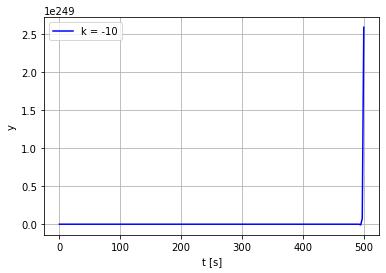

In [3]:
#Kの指定
k = [-10, 3.5, 10]

#伝達関数の分子・分母多項式の係数を指定
n = [[k[0], -k[0]], [k[1], -k[1]], [k[2], -k[2]]]
d = [[1, 1, 2, k[0]-2, 4-k[0]], [1, 1, 2, k[1]-2, 4-k[1]], [1, 1, 2, k[2]-2, 4-k[2]]]

#グラフスタイル設定
color = ["blue", "green", "red"]
linestyle = ["-", "--", "-."]

y = [0, 0, 0]

for i in range(3):
    #システムの伝達関数を定義
    P = tf(n[i], d[i])
    print(n[i], d[i])
    #システムのステップ応答を計算
    y[i], t = step(P, t)

#グラフの出力
plt.plot(t, y[0], color=color[0], linestyle=linestyle[0],
         label="k = {}".format(k[0]))
plt.xlabel("t [s]")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

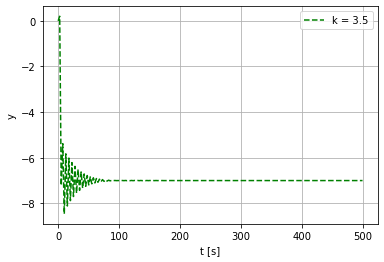

In [4]:
#グラフの出力
plt.plot(t, y[1], color=color[1], linestyle=linestyle[1],
         label="k = {}".format(k[1]))
plt.xlabel("t [s]")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


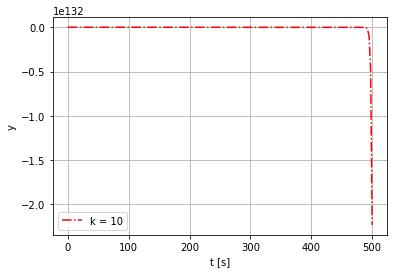

In [5]:
plt.plot(t, y[2], color=color[2], linestyle=linestyle[2],
         label="k = {}".format(k[2]))
plt.xlabel("t [s]")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()